<a href="https://colab.research.google.com/github/e-muf/APIT-Proyecto/blob/main/ProyectoFinal_TwitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
config = pd.read_csv("./config.csv")

In [ ]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [ ]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
twitterAccount = "joeBiden"

In [ ]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [ ]:
df.head()

,Tweet
0,"This year, we’ve painfully learned the cost of..."
1,"Right now, my team isn’t getting all the infor..."
2,"This afternoon, I was briefed by members of my..."
3,"Folks, there’s just over one week until the Ge..."
4,We’ve gotten through tough times before in thi...


In [ ]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [ ]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"This year, we’ve painfully learned the cost of...",0.900000,-0.700000
1,"Right now, my team isn’t getting all the infor...",0.767857,0.142857
2,"This afternoon, I was briefed by members of my...",0.125000,-0.125000
3,"Folks, there’s just over one week until the Ge...",0.000000,0.000000
4,We’ve gotten through tough times before in thi...,0.833333,-0.388889
5,From COVID-19 and the economy to climate chang...,0.000000,0.000000
6,To all the health care workers on the front li...,0.650000,0.350000
7,"After a year of pain and loss, it’s time to un...",0.000000,0.000000
8,Jill and I send our heartfelt wishes to everyo...,1.000000,0.000000
9,"From our family to yours, Merry Christmas and ...",1.000000,0.800000


In [ ]:
df = df.drop(df[df['Tweet'] == ''].index)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"This year, we’ve painfully learned the cost of...",0.900000,-0.700000
1,"Right now, my team isn’t getting all the infor...",0.767857,0.142857
2,"This afternoon, I was briefed by members of my...",0.125000,-0.125000
3,"Folks, there’s just over one week until the Ge...",0.000000,0.000000
4,We’ve gotten through tough times before in thi...,0.833333,-0.388889
5,From COVID-19 and the economy to climate chang...,0.000000,0.000000
6,To all the health care workers on the front li...,0.650000,0.350000
7,"After a year of pain and loss, it’s time to un...",0.000000,0.000000
8,Jill and I send our heartfelt wishes to everyo...,1.000000,0.000000
9,"From our family to yours, Merry Christmas and ...",1.000000,0.800000


In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,"This year, we’ve painfully learned the cost of...",0.900000,-0.700000,Negative
1,"Right now, my team isn’t getting all the infor...",0.767857,0.142857,Positive
2,"This afternoon, I was briefed by members of my...",0.125000,-0.125000,Negative
3,"Folks, there’s just over one week until the Ge...",0.000000,0.000000,Neutral
4,We’ve gotten through tough times before in thi...,0.833333,-0.388889,Negative
5,From COVID-19 and the economy to climate chang...,0.000000,0.000000,Neutral
6,To all the health care workers on the front li...,0.650000,0.350000,Positive
7,"After a year of pain and loss, it’s time to un...",0.000000,0.000000,Neutral
8,Jill and I send our heartfelt wishes to everyo...,1.000000,0.000000,Neutral
9,"From our family to yours, Merry Christmas and ...",1.000000,0.800000,Positive


In [ ]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

36.0 % of positive tweets


<BarContainer object of 3 artists>

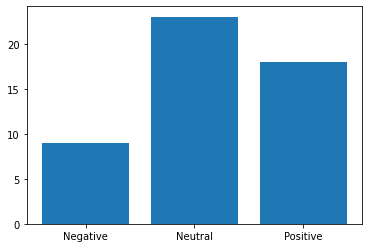

In [ ]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

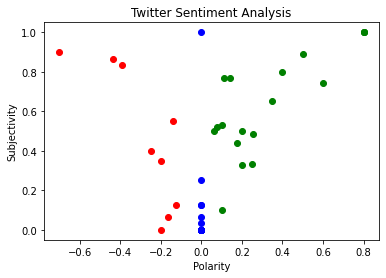

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [ ]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

36.0 % of objective tweets


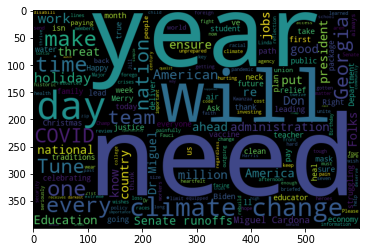

In [ ]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()